In [1]:
import pandas
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/usr/local/lib/python2.7/dist-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/usr/local/lib/python2.7/dist-packages/pandas/core/indexes/base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate bi

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/scipy/cluster/vq.py:88: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _vq
/usr/local/lib/python2.7/dist-packages/scipy/cluster/hierarchy.py:178: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _hierarchy


In [12]:
inpIMF = [ "Bx, By, Bz, Vx, Np", "By, Bz, Vx, Np",\
                 "Bx, By, Bz, Np", "Bx, By, Vx, Np",\
                "By, Bz, Vx", "Bz, Vx", "Bz", "Vx",\
                 "By", "Bx", "Np" ]
prDict = {}
prDict["$PRN_{1}$"] = [ 0.75, 0.75, 0.75, 0.69, 0.76, 0.76, 0.73, 0.68, 0.67, 0.66, 0.63 ]
prDict["$RCL_{1}$"] = [ 0.83, 0.84, 0.75, 0.78, 0.80, 0.80, 0.74, 0.72, 0.67, 0.67, 0.47 ]
prDict["$PRN_{0}$"] = [ 0.76, 0.77, 0.70, 0.69, 0.74, 0.74, 0.68, 0.64, 0.60, 0.60, 0.51 ]
prDict["$RCL_{0}$"] = [ 0.68, 0.67, 0.70, 0.59, 0.70, 0.69, 0.67, 0.59, 0.60, 0.58, 0.67 ]
# convert to DF
prDF = pandas.DataFrame(prDict, index=inpIMF)
prDF.sort_values(by=['$PRN_{1}$', '$RCL_{1}$'], inplace=True, ascending=False)
prDF = prDF[ ['$PRN_{1}$', '$RCL_{1}$', '$PRN_{0}$', '$RCL_{0}$'] ]
prDF.head()

,$PRN_{1}$,$RCL_{1}$,$PRN_{0}$,$RCL_{0}$
"By, Bz, Vx",0.76,0.80,0.74,0.70
"Bz, Vx",0.76,0.80,0.74,0.69
"By, Bz, Vx, Np",0.75,0.84,0.77,0.67
"Bx, By, Bz, Vx, Np",0.75,0.83,0.76,0.68
"Bx, By, Bz, Np",0.75,0.75,0.70,0.70


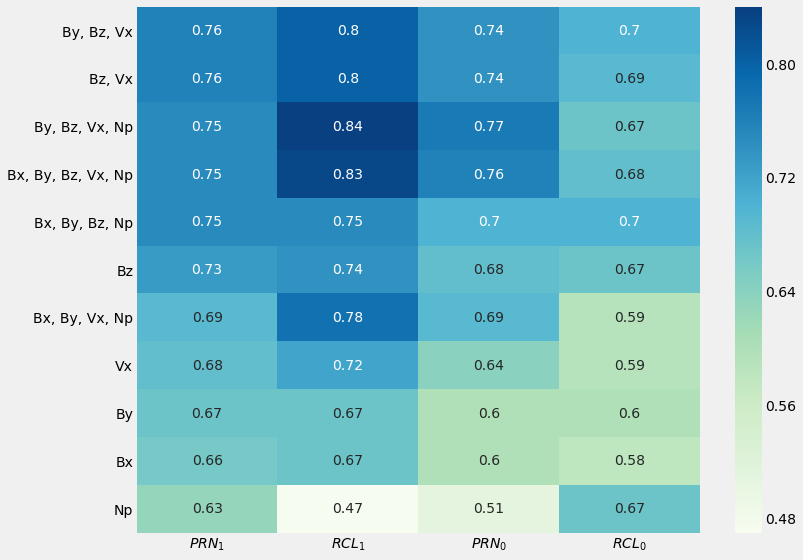

In [21]:
plt.style.use("fivethirtyeight")
fig, axes = plt.subplots(nrows=1, ncols=1,\
                    figsize=(12,8), sharex=True)
sns.heatmap(prDF, annot=True, cmap="GnBu") #Blues, #BuPu, #GnBu, #PuBu
fig.tight_layout()
fig.savefig("../plots/param_imp.png")